In [1]:
import tensorflow
from tensorflow.keras.applications.resnet50 import preprocess_input,decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def classify(img_path):
    img_path = "cat.jpg"
    img = image.load_img(img_path, target_size = (224,224))
    model = tensorflow.keras.applications.resnet50.ResNet50()
    img_array = image.img_to_array(img)
    img_batch = np.expand_dims(img_array, axis = 0)
    img_preprocessed = preprocess_input(img_batch)
    prediction = model.predict(img_preprocessed)
    print(decode_predictions(prediction,top= 3)[0])        

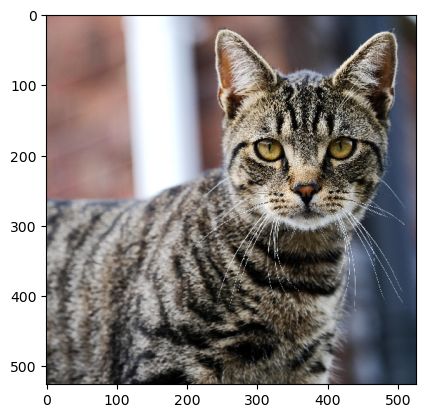

In [3]:
img_path = "cat.jpg"
img = image.load_img(img_path, target_size = (526,526))
plt.imshow(img)

In [4]:
classify(img_path)

1/1 [==============================] - 1s 808ms/step
[('n02123159', 'tiger_cat', 0.6182766), ('n02123045', 'tabby', 0.3597273), ('n02124075', 'Egyptian_cat', 0.0137803815)]


## Cats vs Dogs

In [50]:
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten,Dense,Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications.mobilenet import MobileNet, preprocess_input 
import math
import matplotlib.image as mpimg

In [6]:
TRAIN_DATA_DIR = 'train'
VALIDATION_DATA_DIR = 'valid'
TRAIN_SAMPLES = 600
VALIDATION_SAMPLES = 600
NUM_CLASSES = 2
IMG_WIDTH,IMG_HEIGHT = 512,512
BATCH_SIZE = 16

In [7]:
train_datagen = ImageDataGenerator(preprocessing_function = preprocess_input,
                                  rotation_range = 20,
                                  width_shift_range = 0.2,
                                  height_shift_range = 0.2,
                                  zoom_range = 0.2)
val_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)


In [8]:
train_generator = train_datagen.flow_from_directory(
    TRAIN_DATA_DIR,
    target_size  = (IMG_WIDTH, IMG_HEIGHT),
    batch_size = BATCH_SIZE,
    shuffle = True,
    seed = 123,
    class_mode = 'categorical')

validation_generator = val_datagen.flow_from_directory(
    VALIDATION_DATA_DIR,
    target_size  = (IMG_WIDTH, IMG_HEIGHT),
    batch_size = BATCH_SIZE,
    shuffle = False,
    class_mode = 'categorical')


Found 600 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


In [9]:
def model_maker():
    base_model=MobileNet(include_top=False,input_shape=(IMG_WIDTH,IMG_HEIGHT,3))
    for layer in base_model.layers[:]:
        layer.trainable=False
        input=Input(shape=(IMG_WIDTH,IMG_HEIGHT,3))
        custom_model=base_model(input)
        custom_model=GlobalAveragePooling2D()(custom_model)
        custom_model=Dense(64,activation='relu')(custom_model)
        custom_model=Dropout(0.5)(custom_model)
        predictions=Dense(NUM_CLASSES,activation='sigmoid')(custom_model)
        return Model(inputs=input,outputs=predictions)


In [10]:
model = model_maker()
model.compile(loss = 'binary_crossentropy',
              optimizer = tensorflow.keras.optimizers.Adam(lr = 0.001),
              metrics = ['acc'])
num_steps = math.ceil(float(TRAIN_SAMPLES)/BATCH_SIZE)
model.fit_generator(train_generator, steps_per_epoch = num_steps,
                    epochs = 10,
                    validation_data = validation_generator,
                    validation_steps = num_steps)

C:\Users\Nitiz Khanal\AppData\Local\Temp\ipykernel_5708\711717641.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_generator, steps_per_epoch = num_steps,


Epoch 1/10
38/38 [==============================] - 209s 5s/step - loss: 0.5418 - acc: 0.7850 - val_loss: 0.6891 - val_acc: 0.8217
Epoch 2/10
38/38 [==============================] - 199s 5s/step - loss: 0.3206 - acc: 0.8850 - val_loss: 3.0037 - val_acc: 0.6317
Epoch 3/10
38/38 [==============================] - 203s 5s/step - loss: 0.2581 - acc: 0.9117 - val_loss: 9.7456 - val_acc: 0.5100
Epoch 4/10
38/38 [==============================] - 210s 6s/step - loss: 0.2652 - acc: 0.9100 - val_loss: 3.2215 - val_acc: 0.6417
Epoch 5/10
38/38 [==============================] - 204s 5s/step - loss: 0.1488 - acc: 0.9417 - val_loss: 0.9636 - val_acc: 0.8533
Epoch 6/10
38/38 [==============================] - 191s 5s/step - loss: 0.2189 - acc: 0.9200 - val_loss: 2.2559 - val_acc: 0.6417
Epoch 7/10
38/38 [==============================] - 188s 5s/step - loss: 0.1754 - acc: 0.9517 - val_loss: 0.5649 - val_acc: 0.8467
Epoch 8/10
38/38 [==============================] - 197s 5s/step - loss: 0.1204 - a

In [11]:
model.save('catsvsdogs.h5')

In [12]:
from tensorflow.keras.models import load_model
model = load_model('catsvsdogs.h5')

In [13]:
img_path = "dog.jpg"
img=image.load_img(img_path,target_size=(512,512))
img_array=image.img_to_array(img)
expanded_img_array=np.expand_dims(img_array,axis=0)
preprocessed_img=preprocess_input(expanded_img_array)

prediction=model.predict(preprocessed_img)
print(prediction)
print(validation_generator.class_indices)

1/1 [==============================] - 0s 383ms/step
[[0.01100751 0.98465294]]
{'cat': 0, 'dog': 1}


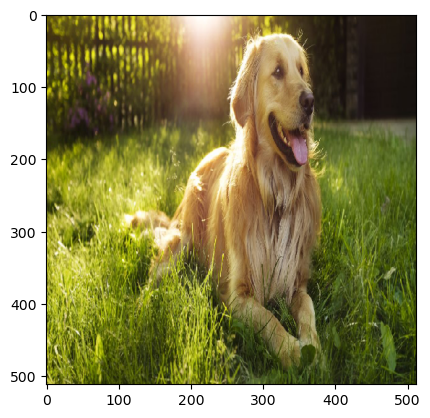

In [14]:
plt.imshow(img)

In [20]:
ground_truth = validation_generator.classes
ground_truth.shape

(600,)

In [46]:
predictions = model.predict_generator(validation_generator)
prediction_table = {}

for index, (val,f_name) in enumerate(zip(predictions, validation_generator.filenames)):
    index_of_highest_probability = np.argmax(val)
    value_of_highest_probability = val[index_of_highest_probability]
    prediction_table[index] = [value_of_highest_probability, index_of_highest_probability, ground_truth[index], f_name]


C:\Users\Nitiz Khanal\AppData\Local\Temp\ipykernel_5708\3128420293.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(validation_generator)


In [51]:
def get_images_with_sorted_probabilities(prediction_table, get_highest_probability, label, number_of_items, only_false_predictions=False):
    sorted_prediction_table = [ (k, prediction_table[k]) for k in
    sorted(prediction_table, key=prediction_table.get, reverse= get_highest_probability)]
    result = []
    for index, key in enumerate(sorted_prediction_table):
        image_index, [probability, predicted_index, gt, fn] = key
        if predicted_index == label:
            if only_false_predictions == True:
                if predicted_index != gt:
                    result.append([image_index, [probability, predicted_index, gt, fn] ])
            else:
#                 if predicted_index == gt:
                result.append([image_index, [probability, predicted_index, gt, fn] ])
        if len(result) >= number_of_items:
            return result

In [76]:

# Helper functions to plot the nearest images given a query image
def plot_images(filenames, distances, message):
    images = []
    for filename in filenames:
        print(filename)
        images.append(mpimg.imread(filename))
    plt.figure(figsize=(20,15))
    columns = 5
    for i, image in enumerate(images):
        ax = plt.subplot(int(len(images) / columns + 1), columns, i + 1)
        ax.set_title( "\n\n"+  filenames[i].split("/")[-1]+"\n"+"\nProbability: " +
        str(float("{0:.2f}".format(distances[i]))))
        plt.suptitle( message, fontsize=20, fontweight='bold')
        plt.axis('off')
        plt.imshow(image)


def display(sorted_indicies, message):
    similar_image_paths = []
    distances = []
    for name, value in sorted_indicies:
        [probability, predicted_index, gt, fn] = value
        similar_image_paths.append("valid\\" + value[3])
        distances.append(probability)
    plot_images(similar_image_paths, distances, message)

valid\dog\dog.12494.jpg
valid\dog\dog.12489.jpg
valid\dog\dog.12480.jpg
valid\dog\dog.12472.jpg
valid\dog\dog.12451.jpg
valid\dog\dog.12448.jpg
valid\dog\dog.12445.jpg
valid\dog\dog.12438.jpg
valid\dog\dog.12433.jpg
valid\dog\dog.12424.jpg


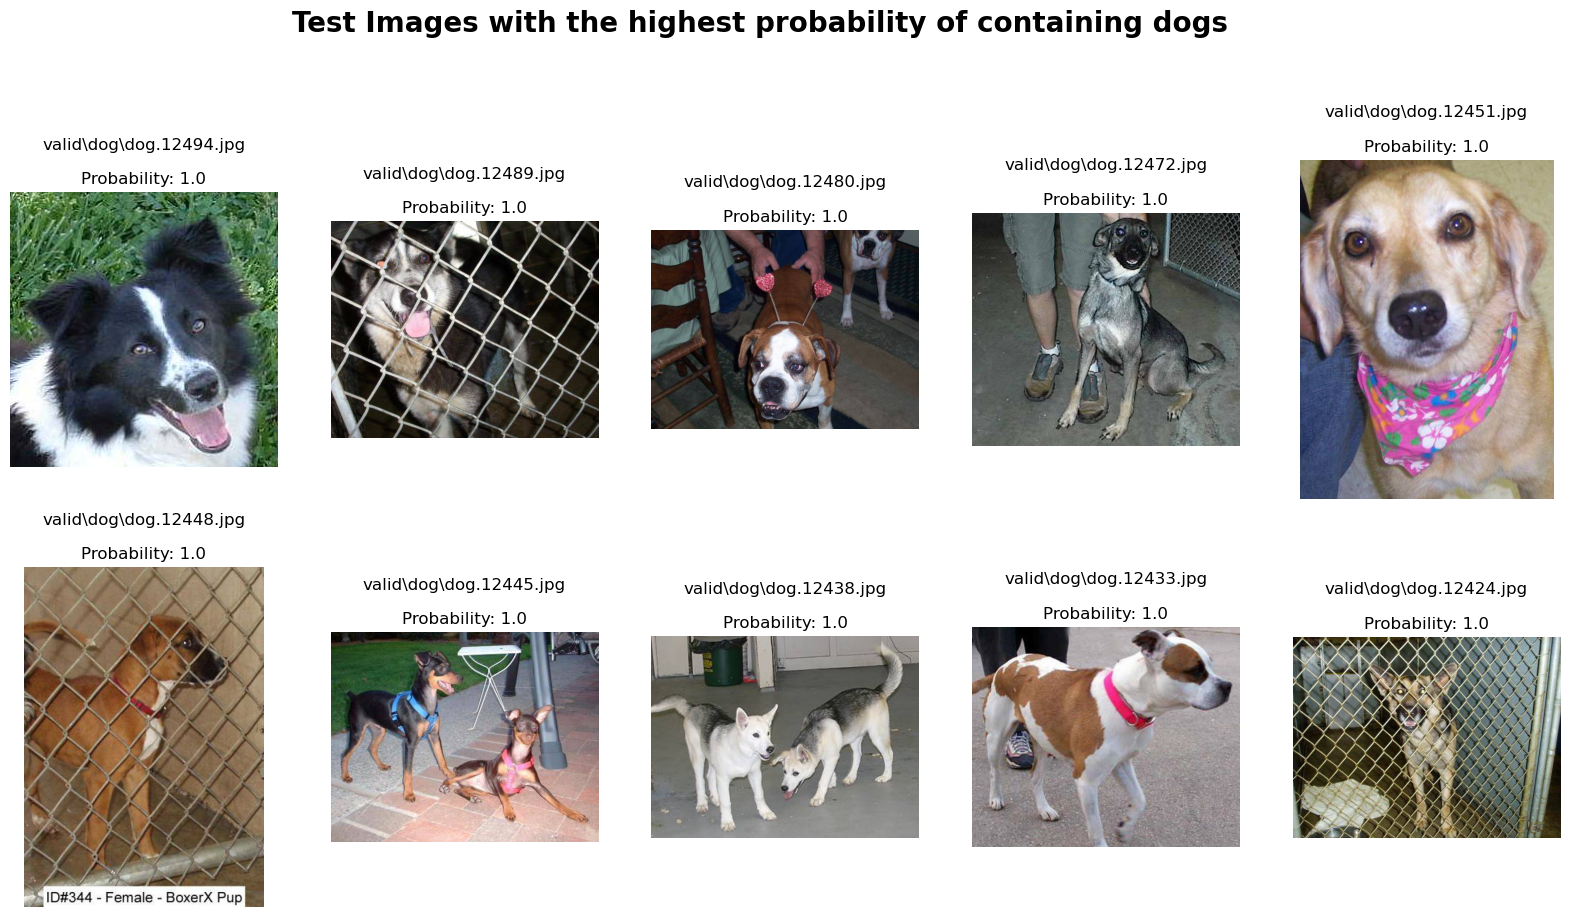

In [77]:
indices = get_images_with_sorted_probabilities(prediction_table, True, 1, 10, False)
message = 'Test Images with the highest probability of containing dogs'
display(indices[:10], message)

valid\cat\cat.434.jpg
valid\cat\cat.531.jpg
valid\cat\cat.596.jpg
valid\cat\cat.386.jpg
valid\cat\cat.589.jpg
valid\cat\cat.334.jpg
valid\dog\dog.12427.jpg
valid\dog\dog.12382.jpg
valid\dog\dog.12446.jpg
valid\cat\cat.396.jpg


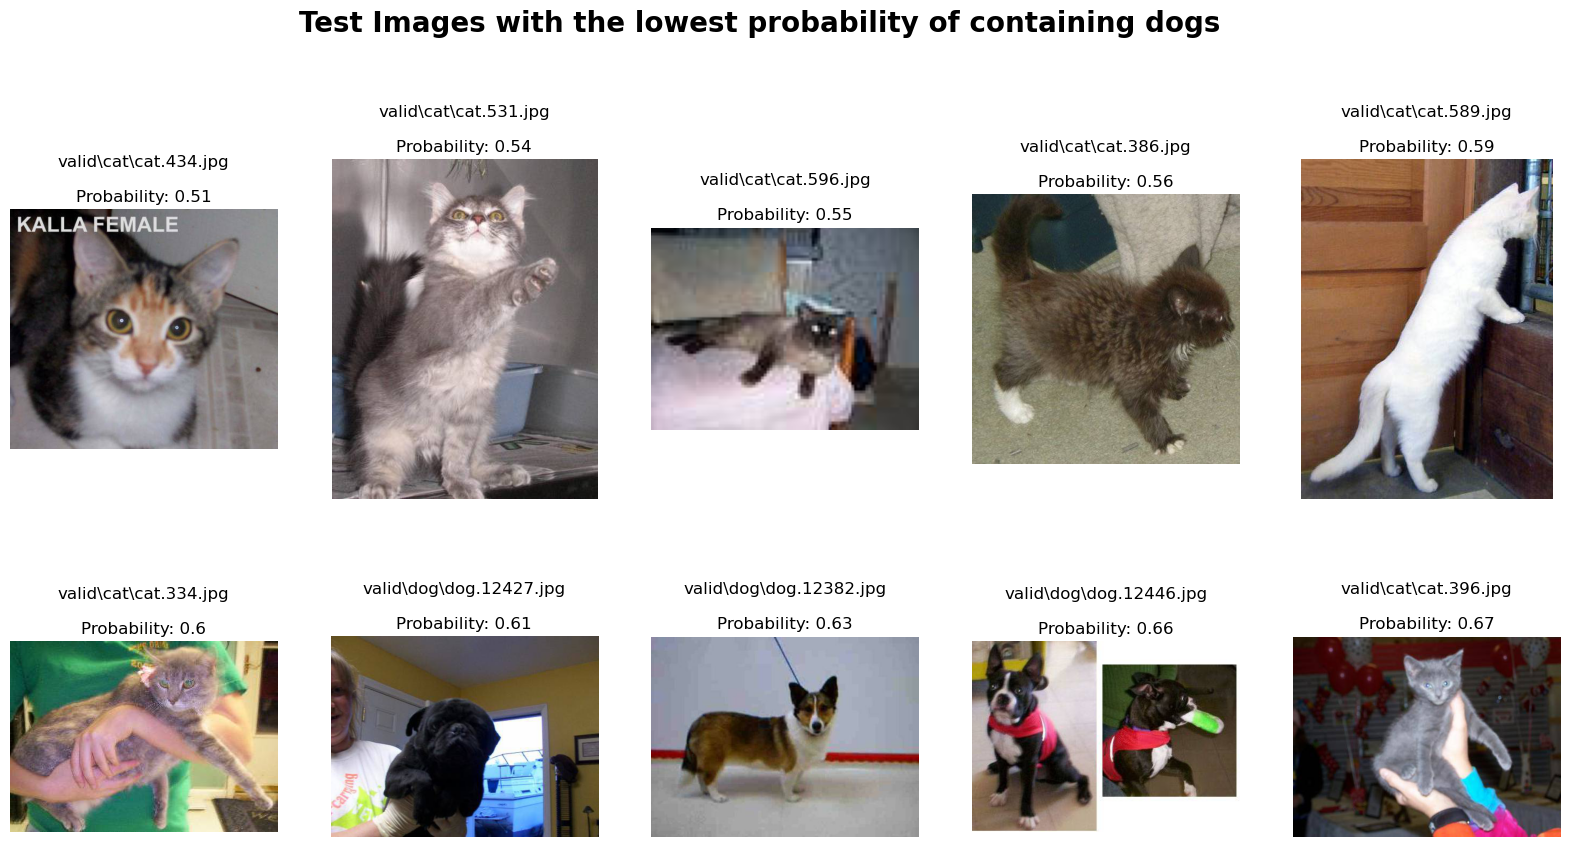

In [78]:
# Least confident predictions of 'dog'
indices = get_images_with_sorted_probabilities(prediction_table, False, 1, 10, False)
message = 'Test Images with the lowest probability of containing dogs'
display(indices[:10], message)

valid\cat\cat.320.jpg
valid\cat\cat.329.jpg
valid\cat\cat.385.jpg
valid\cat\cat.532.jpg
valid\cat\cat.478.jpg
valid\cat\cat.387.jpg
valid\cat\cat.389.jpg
valid\cat\cat.403.jpg
valid\cat\cat.463.jpg
valid\cat\cat.547.jpg


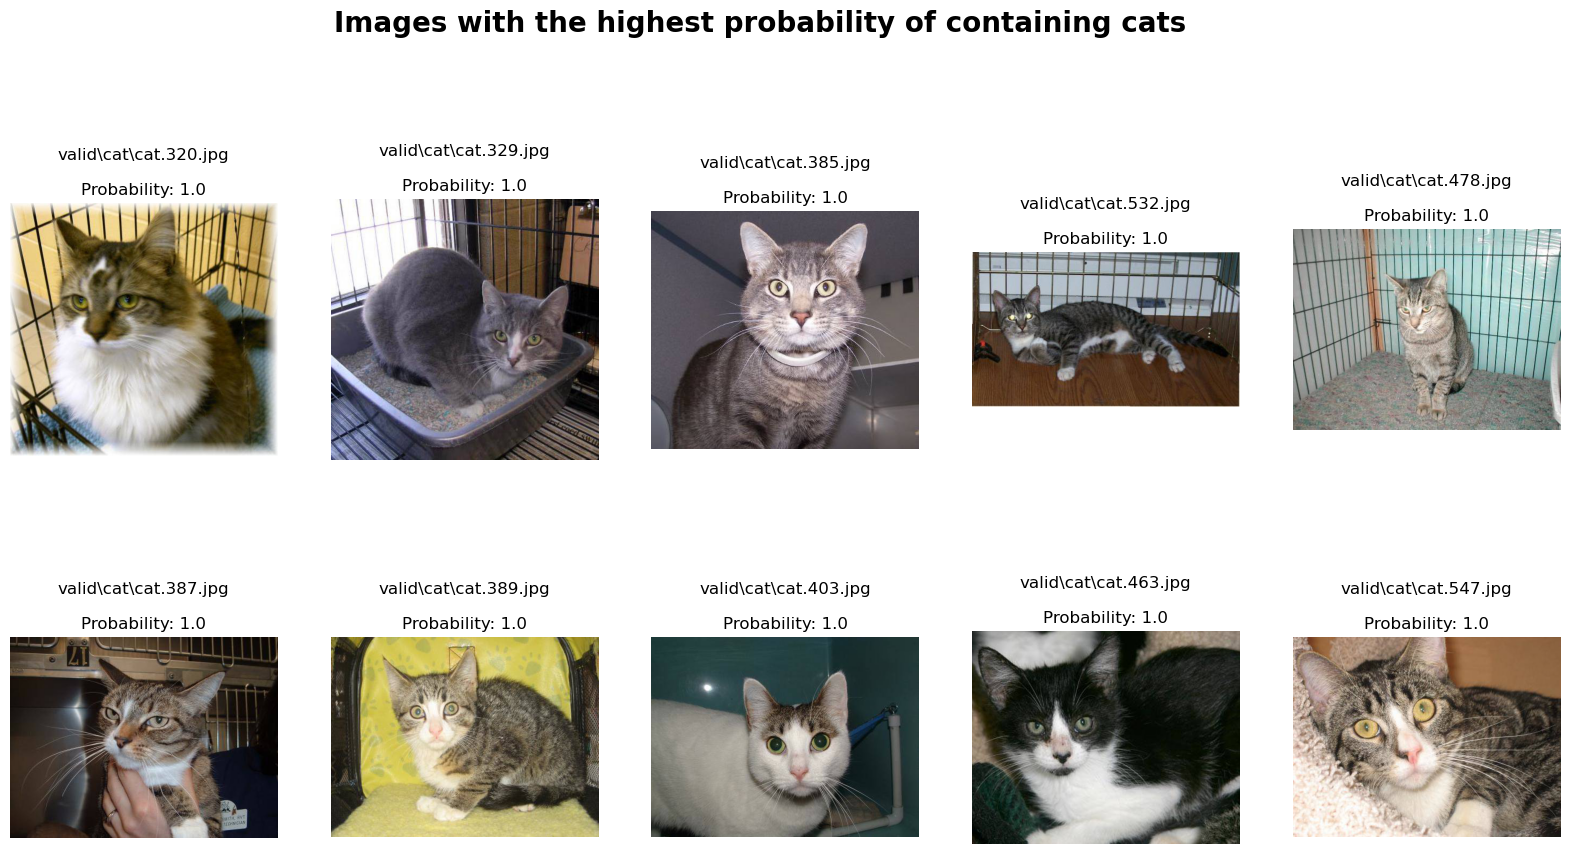

In [79]:
# Most confident predictions of 'cat'
indices = get_images_with_sorted_probabilities(prediction_table, True, 0, 10, False)
message = 'Images with the highest probability of containing cats'
display(indices[:10], message)